## Exercise 1
Some simple plotting

## Exercise 2
Some more advanced plotting

## Exercise 3
- Computing OLS by matrix inversion
- Plotting OLS and data
- Comparing to scipy regression function

## Exercise 4

(a) Write two functions **demand** and **supply** that both take three arguments, quantity **x** and two function-specific parameters, and capture inverse demand and supply:
\begin{align}
    p^d &= a - b x \\
    p^s &= c + d x
\end{align}

(b) Use a root-finding algorithm to solve for the market-clearing price $p^*$. It may be helpful to define a third function, **excess_demand**, that makes use of the two functions above. Find $p^*$ for $a = 5$, $b = 0.4$, $c = 0$ and $d = 0.3$. 

(c) Import **matplotlib.pyplot** and **seaborn**. Use your functions to replicate the following figure, including all the labels. The parameter values used to generate the graph are the same as in question (b). 


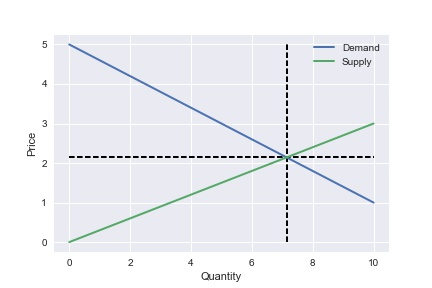

In [8]:
from IPython.display import Image
Image('marketprice.jpg')

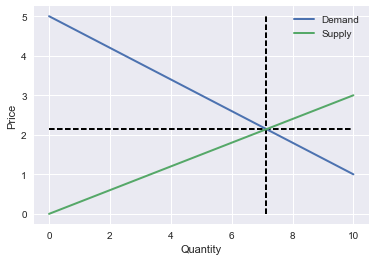

In [9]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn


def demand(x, a, b):
    return a - b * x

def supply(x, c, d):
    return c + d * x

def excess_demand(x, a, b, c, d):
    return demand(x, a, b) - supply(x, c, d)

a, b, c, d = 5, 0.4, 0, 0.3

x_mc = scipy.optimize.bisect(excess_demand, 0, 10, args = (a, b, c, d))
p_mc = supply(x_mc, c, d)


x = np.linspace(0, 10, 100)
fig, ax = plt.subplots()
ax.plot(x, demand(x, 5, 0.4), linewidth= 2, label = 'Demand')
ax.plot(x, supply(x, 0, 0.3), linewidth= 2, label = 'Supply')
ax.vlines(x_mc, 0, 5, color='k', linestyle="--", linewidth= 2)
ax.hlines(p_mc, 0, 10, color='k', linestyle="--", linewidth= 2)
ax.set_xlabel('Quantity')
ax.set_ylabel('Price')
ax.legend()
# fig.savefig('marketprice.jpg')

## Exercise 5

In one of the previous problem sets (Week 3 - Strings, question 7), we coded a simple version of the Battleship game. In this question, we use **matplotlib.pyplot** to improve on one dimension of this implementation, the graphical output. If you haven't solved the previous question, feel free to use the code provided in the suggested solutions for that week.

Recall that in our implementation of Battleship, we represented the board (i.e. the ocean) as a list of lists. A tile (i.e., a square of the ocean) was represented by a string, a **"O"** if the tile had not een uncovered yet and an **"X"** if it had been uncovered but without finding the ship. Now, we are going to represent the board as a Numpy array of 0's and 1's, with **0** representing not yet uncovered tiles and **1** representing tiles that have been unsuccessfully checked.

(a) Import **numpy**, **matplotlib.pyplot** and (as before) the **random** module. In addition, run the following import statement: **from IPython import display**.

(b) Modify the **generate_board** function from the previous versions such that it still takes the arguments **x_b** and **y_b**, but returns a *Numpy array* of dimension **x_b**-by-**y_b**, filled with zeros.

(c) Below, we have provided a new version of the **print_board** function. Run the cell below *after you have finished question (b)*. You should get a figure that consists of a blue square.

(d) In the **run_game** function, make the following modifications:

1. Add the lines **fig, ax = plt.subplots()** and **ax.grid()** at the beginning of the function.
2. **print_board** now takes three arguments, instead of one argument as in the previous implementation. Add the arguments **fig** and **ax** to every occurrence of **print_board**.
3. Finally, modify your code so it properly updates tiles on your board from 0 to 1. Hint: In the previous version, the **run_game** function updated tiles from "O" to "X". In addition to replacing "X"s with 1's in your code, there is one small adjustment you have to make - recall that indexing for two-dimensional Numpy arrays works differently than for lists of lists!

(e) Test your implementation for a 5-by-5 board.


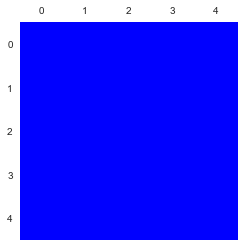

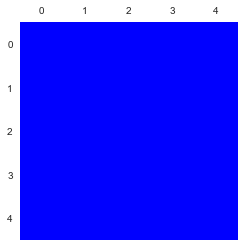

In [12]:
## PROVIDE THIS ONE IN THE QUESTION!

def print_board(board, fig, ax):
    ax.matshow(board, cmap='bwr')
    display.display(fig)

fig, ax = plt.subplots()
ax.grid()    
board = generate_board(5, 5)
print_board(board, fig, ax)


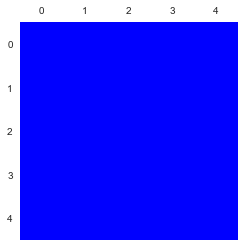

(0, 4)
Current turn: 1
Guess Row:1
Guess Col:1
You missed my battleship!


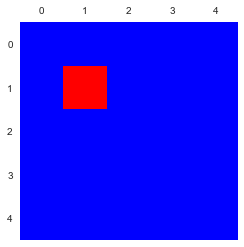

Current turn: 2
Guess Row:2
Guess Col:2
You missed my battleship!


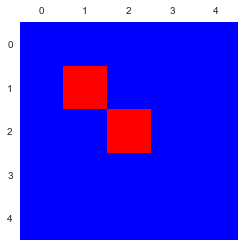

Current turn: 3
Guess Row:3
Guess Col:3
You missed my battleship!


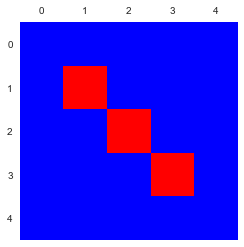

Game Over


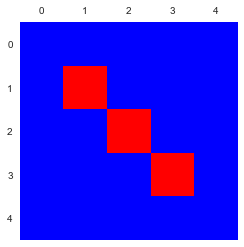

In [10]:
## (a): import packages

import numpy as np
import matplotlib.pyplot as plt

from random import randint
from IPython import display


## (b): generate board
def generate_board(x_b, y_b):
    return np.zeros((x_b, y_b))   


## (d)
def print_board(board, fig, ax):
    ax.matshow(board, cmap='bwr')
    display.display(fig)

def random_pos(x_b, y_b):
    return (randint(0, x_b - 1), randint(0, y_b - 1))

def run_game(x_b, y_b, max_turn):
    
    fig, ax = plt.subplots()
    ax.grid()
    
    board = generate_board(x_b, y_b)
    print_board(board, fig, ax)
    ship_pos = random_pos(x_b, y_b)
    print(ship_pos)
    
    for turn in range(max_turn):
        print('Current turn: {}'.format(turn + 1))
        guess_row = int(input("Guess Row:"))
        guess_col = int(input("Guess Col:"))
    
        if guess_row == ship_pos[0] and guess_col == ship_pos[1]:
            print("Congratulations! You sunk my battleship! You win!")
            break
        else:
            if (guess_row < 0 or guess_row > x_b - 1) or (guess_col < 0 or guess_col > y_b - 1):
                print("Oops, that's not even in the ocean.")
            elif(board[guess_row, guess_col] == 1):
                print("You guessed that one already.")
            else:
                print("You missed my battleship!")
                board[guess_row, guess_col] = 1
            
            print_board(board, fig, ax)
            if turn + 1 == 3:
                print("Game Over")


## (e)
x_b, y_b = 5, 5
max_turn = 3
run_game(x_b, y_b, max_turn)

## Exercise 5 -> ADD QUESTION FROM CLIMATE_ECON PS 4 

Solve the model in the previous question (without the externality) numerically for a more general setting, in particular with a CIES utility function and less than full depreciation. Choose reasonable values for the parameters. How does the optimal extraction profile depend on the growth rate of total factor productivity?

### Answer
Solving the model numerically is straightforward. The code should look familiar from the two-period model we have seen in previous lectures. In particular, we can again use Scipy's minimization routine (**scipy.optimize.minimize**).

Note that since there is no extraction or externality cost caused by fossil fuel use, the complete resource stock will be used over the two periods.

In [ ]:
## Define functions
def u(x, nu):
    """
    Utility function
    """
    if nu == 1: # logarithmic utility
        return np.log(x)
    else:
        return (1 - nu)**(-1) * x**(1-nu)
    
def F(k, e, alpha, A):
    """
    Production function: Cobb-Douglas
    """
    return A * k**(alpha) * e**(1-alpha)

def obj(x, alpha, A1, g, beta, delta, nu, K1):
    """
    Computes the social planner's objective function, i.e. the representative agent's lifetime utility
    """
    E1, I = x
    return - u(F(K1, E1, alpha, A1) - I, nu) \
            - beta * u( F( (1-delta) * K1 + I, R - E1, alpha, (1 + g) * A1) + (1 - delta) * ( (1-delta) * K1 + I), nu)


## Set parameters
alpha = 0.6
beta = 0.98
R = 1
K1 = 1
A1 = 1
nu = 2
delta = 0.9

## Closed-form solution (with log utility and full depreciation), used as initial guess below
E1 = R * (1 + alpha * beta)/(1 + alpha * beta + beta)
K2 = alpha * beta * F(K1, E1, alpha, A1) / (1 + alpha * beta)
x0 = [E1, K2]
print(x0)

## determine bounds for choice variables
bnds = [(1e-8, 1e+12), (1e-8, 1e+12)]


## Baseline
g = 0.1
# run minimization routine
res = scipy.optimize.minimize(obj, x0,\
                              args = tuple([alpha, A1, g, beta, delta, nu, K1]), \
                              bounds = bnds, method='SLSQP', tol = 1e-12)
print(res.x)

## Increase productivity growth
g = 0.2
res = scipy.optimize.minimize(obj, x0,\
                              args = tuple([alpha, A1, g, beta, delta, nu, K1]), \
                              bounds = bnds, method='SLSQP', tol = 1e-12)
print(res.x)

We can see that less than full depreciation and non-logarithmic utility, higher productivity growth leads to less investment and hence a lower capital stock in period 2. This is intuitive: recall that $\nu > 1$ indicates a lower elasticity of intertemporal substitution (or a higher aversion to intertemporal consumption inequality), hence if the household is richer in the future (due to a higher productivity), the incentive to save today is weaker. A lower capital stock in period 2 implies that the marginal return to capital - $F_K(K_2, E_2) + 1 - \delta$ - increases. By the Hotelling rule, this implies that the *relative* marginal return to fossil fuel in period 2 (relative to period 1) has to rise as well. This can be achieved by shifting extraction from period 2 to period 1, thus leading to a (albeit small) increase in current fossil fuel use.